In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rk_step(y_n, dt, rhs):
    k1 = rhs(y_n)
    k2 = rhs(y_n+dt/2*k1)
    k3 = rhs(y_n+dt/2*k2)
    k4 = rhs(y_n+dt*k3)
    y_np1 = y_n + dt/6 *(k1+2*k2+2*k3+k4)
    return y_np1

In [3]:
def rhs(y):
    # 
    # y = (x_1 , x_2  ,d x_1/dt  , d x_2/dt  ) 
    #
    #  m = 1
    #  k = 1
    dydt = np.array([ y[2], y[3],  y[1]-2*y[0], y[0]-2*y[1]  ])
    return dydt

In [55]:
Nsteps = 100000
dt = 0.1
y = np.array([1,1.01,0,0])
ys = np.zeros((Nsteps, 4))
for i in range(Nsteps):
    ys[i] = y
    y = rk_step(y, dt, rhs)

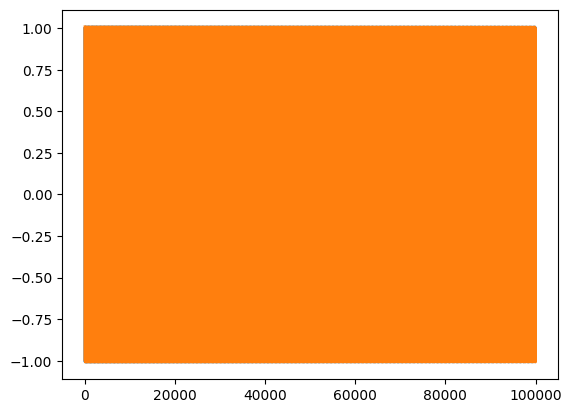

In [56]:
fig, ax = plt.subplots()
ax.plot(ys[:,0])
ax.plot(ys[:,1])

In [57]:
data = ys[:,0]
ps = np.abs(np.fft.fft(data)**2)

In [61]:
?np.fft.fft

Signature: np.fft.fft(a, n=None, axis=-1, norm=None)
Docstring:
Compute the one-dimensional discrete Fourier Transform.

This function computes the one-dimensional *n*-point discrete Fourier
Transform (DFT) with the efficient Fast Fourier Transform (FFT)
algorithm [CT].

Parameters
----------
a : array_like
    Input array, can be complex.
n : int, optional
    Length of the transformed axis of the output.
    If `n` is smaller than the length of the input, the input is cropped.
    If it is larger, the input is padded with zeros.  If `n` is not given,
    the length of the input along the axis specified by `axis` is used.
axis : int, optional
    Axis over which to compute the FFT.  If not given, the last axis is
    used.
norm : {"backward", "ortho", "forward"}, optional
    .. versionadded:: 1.10.0

    Normalization mode (see `numpy.fft`). Default is "backward".
    Indicates which direction of the forward/backward pair of transforms
    is scaled and with what normalization factor

In [58]:
freqs = np.fft.fftfreq(data.size, dt) # cycles/time unit
freqs *= 2.*np.pi # angular frequency
idx = np.argsort(freqs)

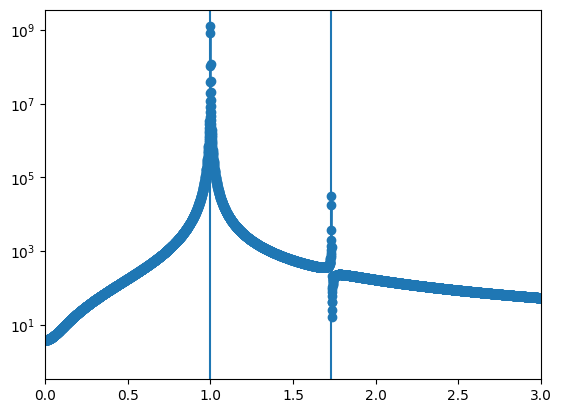

In [59]:
fix, ax = plt.subplots()
ax.plot(freqs[idx], ps[idx])
ax.scatter(freqs[idx], ps[idx])
ax.set_xlim([0,3])
ax.axvline(1)
ax.axvline(np.sqrt(3))
ax.set_yscale("log")